In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
import os
import os.path
import random as pyr
import sys
import tarfile
import argparse
import re
import simplejson
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import matplotlib as mpl
import pprint
import tarfile
import time
import StringIO
pp = pprint.PrettyPrinter(indent=4)
def jsp(x): print simplejson.dumps(x, indent=4, sort_keys=True)
from dlpipes import inputs as dli

from IPython.html import widgets
from IPython.display import display

# train2014

In [3]:
with open("annotations/instances_train2014.json") as stream:
    instances = simplejson.load(stream)
with open("annotations/captions_train2014.json") as stream:
    captions = simplejson.load(stream)
with open("annotations/COCO_Text.json") as stream:
    cocotext = simplejson.load(stream)
with open("annotations/person_keypoints_train2014.json") as stream:
    person = simplejson.load(stream)

In [4]:
instances["images"][0]

{'coco_url': 'http://mscoco.org/images/57870',
 'date_captured': '2013-11-14 16:28:13',
 'file_name': 'COCO_train2014_000000057870.jpg',
 'flickr_url': 'http://farm4.staticflickr.com/3153/2970773875_164f0c0b83_z.jpg',
 'height': 480,
 'id': 57870,
 'license': 5,
 'width': 640}

In [5]:
cocotext.keys()

['imgs', 'cats', 'imgToAnns', 'anns', 'info']

In [6]:
all_images = {}
for x in instances["images"]:
    all_images[x["id"]] = dict(info=x, image=x["file_name"], instances=None, captions=None, texts=None, persons=None)
def dappend(k, x):
    global all_images
    entry = all_images[x["image_id"]]
    if entry.get(k) is None: entry[k] = []
    entry[k].append(x)
for x in instances["annotations"]:
    dappend("instances", x)
for x in captions["annotations"]:
    dappend("captions", x)
for x in person["annotations"]:
    dappend("persons", x)
for _, x in cocotext["anns"].items():
    dappend("texts", x)


In [7]:
def stats(l): return (len(l), amin(l), median(l), mean(l), amax(l))

In [8]:
print stats([len(x["instances"]) for x in all_images.values() if x["instances"] is not None])
print stats([len(x["captions"]) for x in all_images.values() if x["captions"] is not None])
print stats([len(x["persons"]) for x in all_images.values() if x["persons"] is not None])
print stats([len(x["texts"]) for x in all_images.values() if x["texts"] is not None])

(82081, 1, 4.0, 7.3696348728694829, 93)
(82783, 5, 5.0, 5.0023917954169335, 7)
(45174, 1, 2.0, 4.1022712179572318, 20)
(26847, 1, 3.0, 5.4330837709986222, 211)


In [9]:
if isinstance(all_images, dict):
    all_images = sorted(list(all_images.items()))
all_images[0][1].keys()

['info', 'instances', 'persons', 'texts', 'captions', 'image']

In [10]:
import dlpipes.shardwriter
reload(dlpipes.shardwriter)
ShardWriter = dlpipes.shardwriter.ShardWriter

def myimread(fname):
    with open("train2014/"+fname, "rb") as stream:
        return stream.read()
def cvjson(data):
    return simplejson.dumps(data, indent=4)

converters = dict(info=cvjson, image=myimread, persons=cvjson, instances=cvjson, texts=cvjson, captions=cvjson)
names = dict(info="info", image="jpg", persons="persons", instances="instances", texts="texts", captions="captions")

In [11]:
tarf = ShardWriter("coco", converters=converters, names=names)
for k, v in all_images:
    tarf.write("%09d" % k, v)

# writing coco-000000.tgz


KeyboardInterrupt: 

['info', 'instances', 'persons', 'texts', 'captions', 'image']


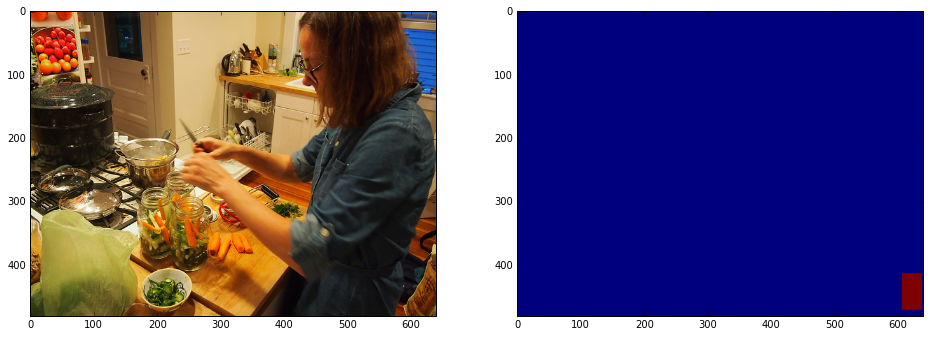

In [48]:
figsize(16,8)
l = list(all_images)
pyr.shuffle(l)
for k, v in l:
    if v["texts"] is None: continue
    print v.keys()
    image = imread("train2014/"+v["image"])
    h, w = image.shape[:2]
    textmap = zeros((h, w), 'f')
    for l in v["texts"]:
        x, y, w, h = [int(r) for r in l["bbox"]]
        textmap[y:y+h, x:x+w] = 1.0
    subplot(121); imshow(image)
    subplot(122); imshow(textmap)
    break

In [13]:
tarf = ShardWriter("cocotext", converters=converters, names=names)
for k, v in all_images:
    if v["texts"] is None: continue
    assert len(v["texts"])>0
    tarf.write("%09d" % k, v)

# writing cocotext-000000.tgz
# writing cocotext-000001.tgz
# writing cocotext-000002.tgz
# writing cocotext-000003.tgz
# writing cocotext-000004.tgz
# writing cocotext-000005.tgz


# val2014

In [14]:
with open("annotations/instances_val2014.json") as stream:
    instances = simplejson.load(stream)
with open("annotations/captions_val2014.json") as stream:
    captions = simplejson.load(stream)
with open("annotations/person_keypoints_val2014.json") as stream:
    person = simplejson.load(stream)

In [15]:
all_images = {}
for x in instances["images"]:
    all_images[x["id"]] = dict(info=x, image=x["file_name"], instances=None, captions=None, texts=None, persons=None)
def dappend(k, x):
    global all_images
    entry = all_images[x["image_id"]]
    if entry.get(k) is None: entry[k] = []
    entry[k].append(x)
for x in instances["annotations"]:
    dappend("instances", x)
for x in captions["annotations"]:
    dappend("captions", x)
for x in person["annotations"]:
    dappend("persons", x)


In [16]:
print stats([len(x["instances"]) for x in all_images.values() if x["instances"] is not None])
print stats([len(x["captions"]) for x in all_images.values() if x["captions"] is not None])
print stats([len(x["persons"]) for x in all_images.values() if x["persons"] is not None])

(40137, 1, 4.0, 7.2719685078605778, 70)
(40504, 5, 5.0, 5.0033083152281259, 7)
(21634, 1, 2.0, 4.0747434593695111, 16)


In [17]:
if isinstance(all_images, dict):
    all_images = sorted(list(all_images.items()))
all_images[0][1].keys()

['info', 'instances', 'persons', 'texts', 'captions', 'image']

In [21]:
def myimread(fname):
    with open("val2014/"+fname, "rb") as stream:
        return stream.read()
converters = dict(info=cvjson, image=myimread, persons=cvjson, instances=cvjson, texts=cvjson, captions=cvjson)
tarf = ShardWriter("coco-val", converters=converters, names=names)
for k, v in all_images:
    tarf.write("%09d" % k, v)

# writing coco-val-000000.tgz
# writing coco-val-000001.tgz
# writing coco-val-000002.tgz
# writing coco-val-000003.tgz
# writing coco-val-000004.tgz
# writing coco-val-000005.tgz
# writing coco-val-000006.tgz
# writing coco-val-000007.tgz
